# Parameter fitting

In [1]:
import matplotlib.pyplot as plt
import sys
import hickle
from pathlib import Path
import numpy as np
from formable.utils import read_non_uniform_csv
from formable.tensile_test import TensileTest
from tensile_test import read_tensile_test_CSV
from matflow import load_workflow
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

## 1. Check Tensile Test Data

### Defining parameters to be read: true stress and true strain

In [2]:
true_strain_col_index= 2 # 0 is left most column
true_stress_col_index= 3 
eng_strain_col_index = None
eng_stress_col_index = None
stress_units="PA" # MPA or GPA
CSV_arguments = {"delimiter":',',"skip_rows":1,"header_row":0}

### Reading data from the paths

In [3]:
## Path:
CSV_file_path = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Novelis"
                 "\Tensile_test\Data organised for Matflow\Tensile_test_AlloyA.csv")
## Data:
TensileTest_data_A = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index,eng_stress_col_index,
                                           true_stress_col_index,true_strain_col_index,stress_units)
## Path:
CSV_file_path = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Novelis"
                 "\Tensile_test\Data organised for Matflow\Tensile_test_AlloyB.csv")
## Data:
TensileTest_data_B = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index,eng_stress_col_index,
                                           true_stress_col_index,true_strain_col_index,stress_units)
## Path:
CSV_file_path = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Mini-project\Experiments\Data\Novelis"
                 "\Tensile_test\Data organised for Matflow\Tensile_test_AlloyC.csv")
## Data:
TensileTest_data_C = read_tensile_test_CSV(CSV_file_path,CSV_arguments,eng_strain_col_index,eng_stress_col_index,
                                           true_stress_col_index,true_strain_col_index,stress_units)

### Extracting the columns needed

In [4]:
exp_true_strainA=TensileTest_data_A['true_strain']
exp_true_stressA=TensileTest_data_A['true_stress']

exp_true_strainB=TensileTest_data_B['true_strain']
exp_true_stressB=TensileTest_data_B['true_stress']

exp_true_strainC=TensileTest_data_C['true_strain']
exp_true_stressC=TensileTest_data_C['true_stress']

### Plotting Damask calibration curve

Text(0.5, 0, 'True Strain')

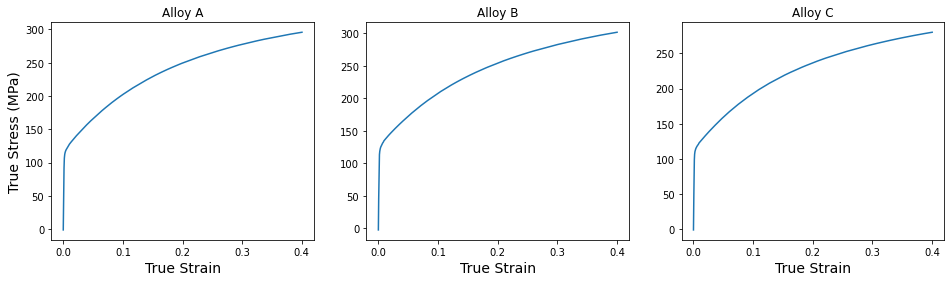

In [15]:
plt.rcParams['figure.figsize'] = 16, 4

plt.subplot(1,3,1);
plt.plot(exp_true_strainA,exp_true_stressA);
plt.title('Alloy A')
plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

plt.subplot(1,3,2);
plt.plot(exp_true_strainB,exp_true_stressB);
plt.title('Alloy B')
#plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

plt.subplot(1,3,3);
plt.plot(exp_true_strainC,exp_true_stressC);
plt.title('Alloy C')
#plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)

## 2. Workflow Analysis: Parameter fitting

### May need to: 
* install matflow -> pip install matflow
* update matflow -> pip install -U matflow
* install version of matflow -> pip install matflow==0.2.15 (0.2.15 is an example version)

### Getting experimental true strain and true stress from the simulations

### Import paths:

In [6]:
fitting_path  = (r"C:\Users\Laura\Dropbox (The University of Manchester)\Matflow_Laura")

In [7]:
fitting_A=fitting_path+'\damask_plastic_parameter_fitting_2021-06-21-140847'
fitting_B=fitting_path+'\damask_plastic_parameter_fitting_2021-06-21-141029'
fitting_C=fitting_path+'\damask_plastic_parameter_fitting_2021-06-21-141205'

### Extracting the workflows from the simulations

In [8]:
workflow_A = load_workflow(fitting_A)
workflow_B = load_workflow(fitting_B)
workflow_C = load_workflow(fitting_C)

Loading matflow config from C:\Users\Laura\.matflow\config.yml
Loading task schemas from 1 file(s)...OK!
Loading software definitions from 1 file(s)...OK!


### Extracting experimental data from the workflows

In [9]:
exp_stress_A = workflow_A.tasks[5].elements[0].outputs.tensile_test['true_stress'] 
exp_strain_A = workflow_A.tasks[5].elements[0].outputs.tensile_test['true_strain'] 
exp_stress_B = workflow_B.tasks[5].elements[0].outputs.tensile_test['true_stress'] 
exp_strain_B = workflow_B.tasks[5].elements[0].outputs.tensile_test['true_strain'] 
exp_stress_C = workflow_C.tasks[5].elements[0].outputs.tensile_test['true_stress']  
exp_strain_C = workflow_C.tasks[5].elements[0].outputs.tensile_test['true_strain'] 

### Plotting the experimental and simulated data

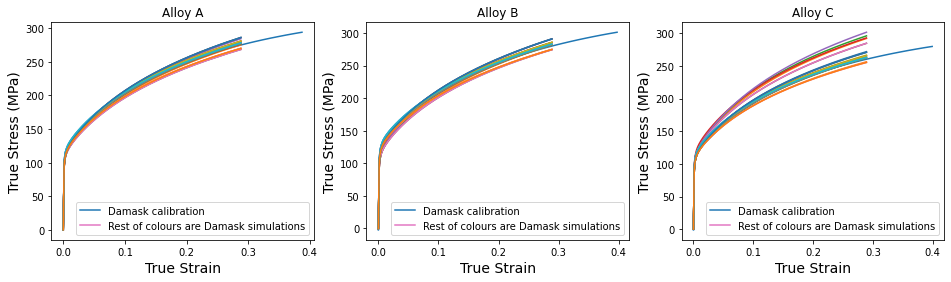

In [10]:
plt.rcParams['figure.figsize'] = 16, 4

############### Alloy A ###########################
plt.subplot(1,3,1);
plt.plot(exp_strain_A[2:-1:50],np.array(exp_stress_A[2:-1:50])/1e6,label='Damask calibration');
for n in range(len(workflow_A.tasks[6].elements)):
    stress = workflow_A.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
    strain = workflow_A.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_strain']['data']
    plt.plot(strain,stress/1e6) 
    if n==4:
        plt.plot(strain,stress/1e6, label='Rest of colours are Damask simulations')
        
plt.title('Alloy A')
plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)
plt.legend()

############### Alloy B ###########################
plt.subplot(1,3,2);
plt.plot(exp_strain_B[2:-1:50],np.array(exp_stress_B[2:-1:50])/1e6,label='Damask calibration');
for n in range(len(workflow_B.tasks[6].elements)):
    stress = workflow_B.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
    strain = workflow_B.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_strain']['data']  
    plt.plot(strain,stress/1e6) 
    if n==4:
        plt.plot(strain,stress/1e6, label='Rest of colours are Damask simulations')
        
plt.title('Alloy B')
plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)
plt.legend()

############### Alloy C ###########################
plt.subplot(1,3,3);
p1, =plt.plot(exp_strain_C[2:-1:50],np.array(exp_stress_C[2:-1:50])/1e6,label='Damask calibration');

for n in range(len(workflow_C.tasks[6].elements)):
    stress = workflow_C.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_stress']['data']
    strain = workflow_C.tasks[6].elements[n].outputs.volume_element_response['vol_avg_equivalent_strain']['data']
    plt.plot(strain,stress/1e6)
    if n==4:
        plt.plot(strain,stress/1e6, label='Rest of colours are Damask simulations')

plt.title('Alloy C')
plt.ylabel('True Stress (MPa)',size=14)
plt.xlabel('True Strain',size=14)
plt.legend()

The optimal initial crystal plasticity parameters correspond to the values of the last simulation, which is the last and best approach (Sim 4). For example:

In [36]:
for n in range(len(workflow_A.tasks[7].elements)):
    h_0_sl_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['h_0_sl_sl']
    xi_0_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_0_sl']
    xi_inf_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_inf_sl']
    a_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['a_sl']
    print("\n      h\u2080 (n =", n+1,") =", round(h_0_sl_sl/1e6,2), "MPa")
print("\n          Optimal value   -------->   h\u2080 = ", round(h_0_sl_sl/1e6,2), "MPa")


      h₀ (n = 1 ) = 431.53 MPa

      h₀ (n = 2 ) = 431.96 MPa

      h₀ (n = 3 ) = 431.93 MPa

      h₀ (n = 4 ) = 431.92 MPa

          Optimal value   -------->   h₀ =  431.92 MPa


## Getting the optimised crystal plasticity parameters

-----------------------------------------

> ### Alloy A

In [12]:
for n in range(len(workflow_A.tasks[7].elements)):
    h_0_sl_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['h_0_sl_sl']
    xi_0_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_0_sl']
    xi_inf_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_inf_sl']
    a_sl = workflow_A.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['a_sl']

print("\n The optimised initial crystal parameters of Alloy A are:\n", "\n   =================================",
      "\n      h\u2080 = ", round(h_0_sl_sl/1e6,2), "MPa", "\n      x\u2080 = ", np.array(xi_0_sl)/1e6, "MPa", "\n      x_inf =", np.array(xi_inf_sl)/1e6,"MPa", "\n      a =", 
      a_sl, "\n   =================================")


 The optimised initial crystal parameters of Alloy A are:
 
      h₀ =  431.92 MPa 
      x₀ =  [41.88064428] MPa 
      x_inf = [230.08345956] MPa 
      a = 4.674085369070763 


-----------------------------------------------------------------------------------

> ### Alloy B

In [13]:
for n in range(len(workflow_B.tasks[7].elements)):
    h_0_sl_sl = workflow_B.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['h_0_sl_sl']
    xi_0_sl = workflow_B.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_0_sl']
    xi_inf_sl = workflow_B.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_inf_sl']
    a_sl = workflow_B.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['a_sl']

    
print("\n The optimised initial crystal parameters of Alloy A are:\n", "\n   =================================",
      "\n      h\u2080 = ", round(h_0_sl_sl/1e6,2), "MPa", "\n      x\u2080 = ", np.array(xi_0_sl)/1e6, "MPa", "\n      x_inf =", np.array(xi_inf_sl)/1e6,"MPa", "\n      a =", 
      a_sl, "\n   =================================")


 The optimised initial crystal parameters of Alloy A are:
 
      h₀ =  407.3 MPa 
      x₀ =  [44.29895104] MPa 
      x_inf = [231.89606878] MPa 
      a = 4.656490168997871 


--------------------------------

> ### Alloy C

In [14]:
for n in range(len(workflow_C.tasks[7].elements)):
    h_0_sl_sl = workflow_C.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['h_0_sl_sl']
    xi_0_sl = workflow_C.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_0_sl']
    xi_inf_sl = workflow_C.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['xi_inf_sl']
    a_sl = workflow_C.tasks[7].elements[n].outputs.single_crystal_parameters['Al']['a_sl']

print("\n The optimised initial crystal parameters of Alloy A are:\n", "\n   =================================",
      "\n      h\u2080 = ", round(h_0_sl_sl/1e6,2), "MPa", "\n      x\u2080 = ", np.array(xi_0_sl)/1e6, "MPa", "\n      x_inf =", np.array(xi_inf_sl)/1e6,"MPa", "\n      a =", 
      a_sl, "\n   =================================")


 The optimised initial crystal parameters of Alloy A are:
 
      h₀ =  419.1 MPa 
      x₀ =  [39.65866336] MPa 
      x_inf = [216.03239275] MPa 
      a = 4.93946922405721 


#### All these optimised values will be introduced in the uniaxial and plane strain simulations.